In [6]:
import glob, pickle

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.interpolate import interp1d
from sklearn.preprocessing import PolynomialFeatures
from os import environ
import matplotlib.dates as md


environ['TZ'] = 'America/Denver'

# Clearness-Sky Index

(3,) 7
310 2018 1.4175596471078955 138.2
1.4175596471078955 69
(108023, 1) (108023, 1) (108023, 1) (108023, 1)
(108092, 1)


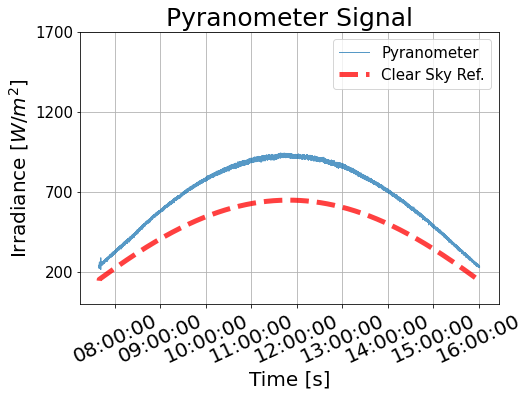

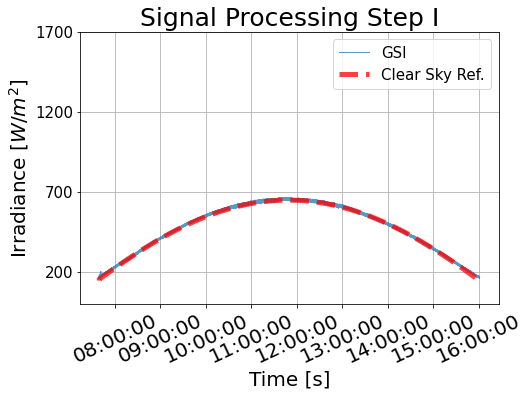

108023


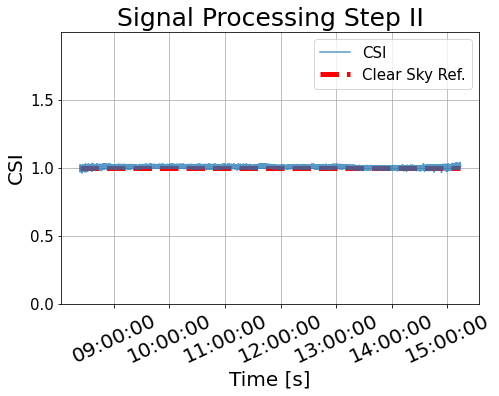

312 2018 1.4195588022795695 138.2
1.4195588022795695 69
(107230, 1) (107230, 1) (107230, 1) (107230, 1)
(107299, 1)


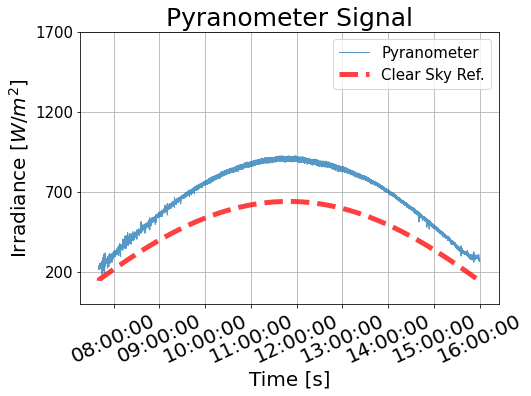

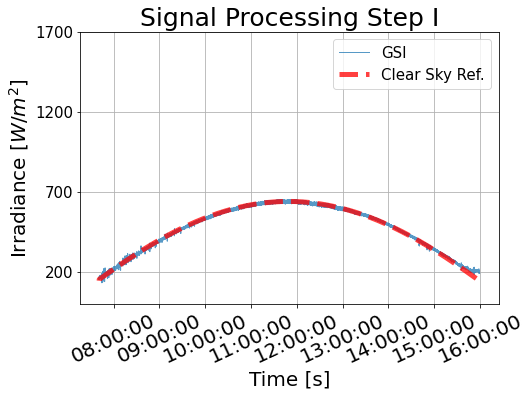

107230


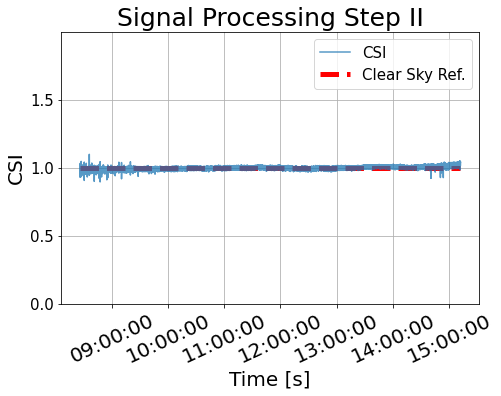

162 2018 1.5145332850775204 2929.5789473684213
1.5145332850775204 1464
(157572, 1) (157572, 1) (157572, 1) (157572, 1)
(159036, 1)


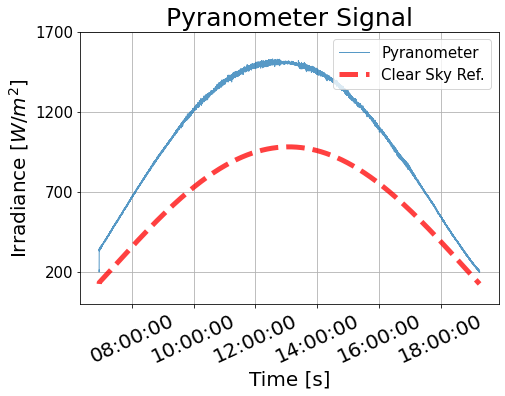

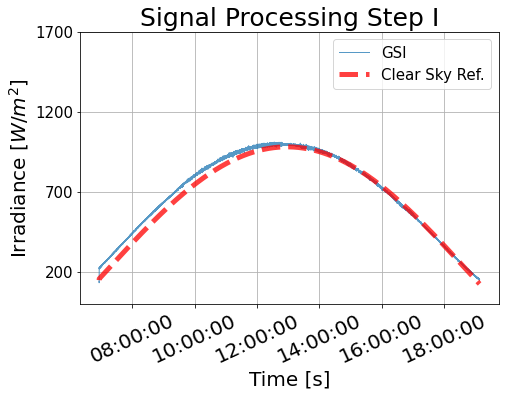

157572


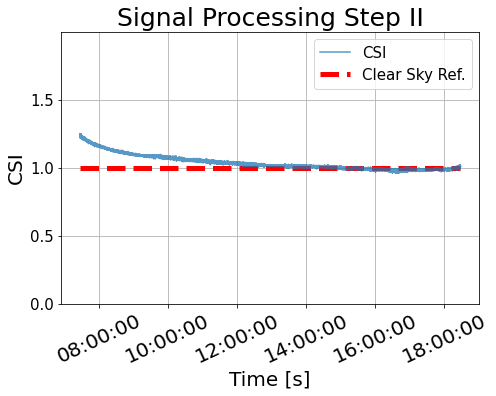

57 2018 1.5658883213914165 -83.18181818181819
1.5658883213914165 -41
(117379, 1) (117379, 1) (117379, 1) (117379, 1)
(117420, 1)


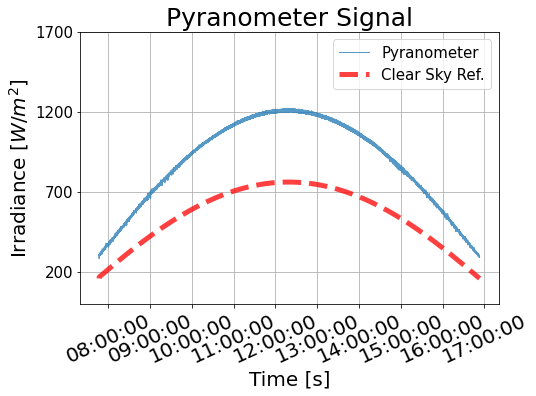

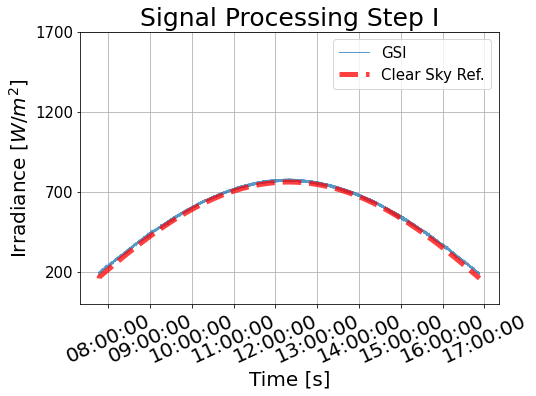

117379


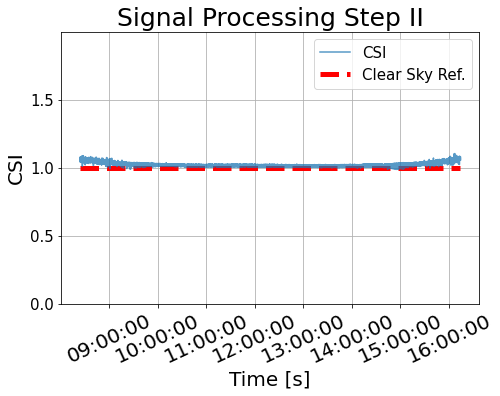

1 2018 1.494540403083433 -83.18181818181819
1.494540403083433 -41
(99088, 1) (99088, 1) (99088, 1) (99088, 1)
(99129, 1)


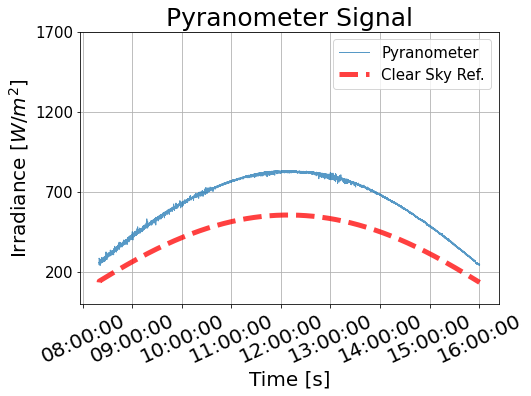

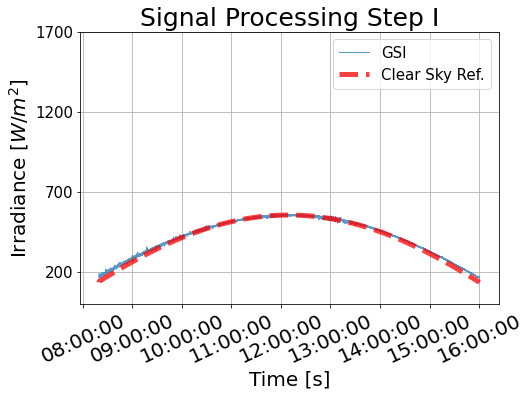

99088


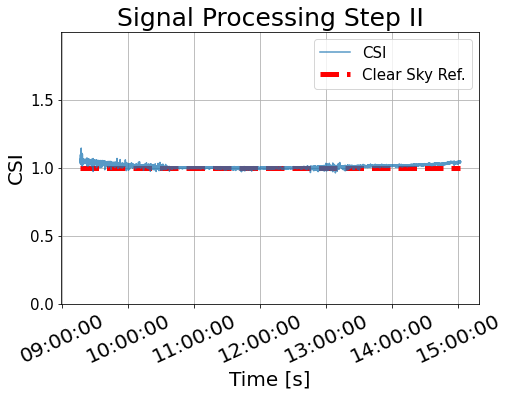

311 2018 1.418548936710303 138.2
1.418548936710303 69
(107645, 1) (107645, 1) (107645, 1) (107645, 1)
(107714, 1)


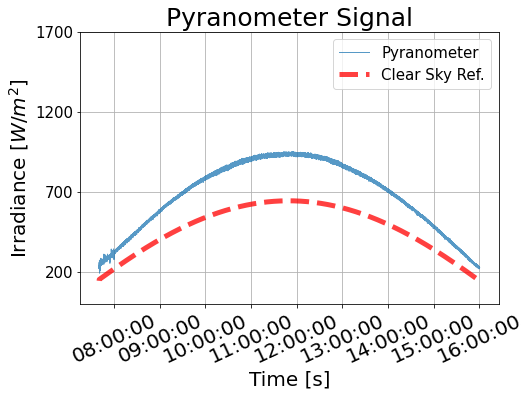

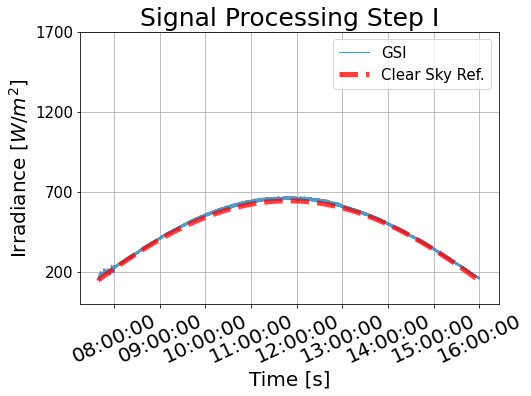

107645


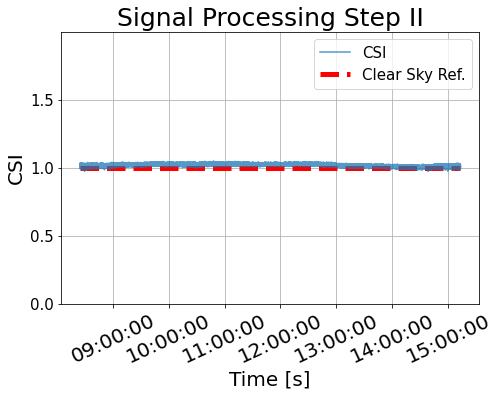

42 2018 1.5515342078688965 -83.18181818181819
1.5515342078688965 -41
(110792, 1) (110792, 1) (110792, 1) (110792, 1)
(110833, 1)


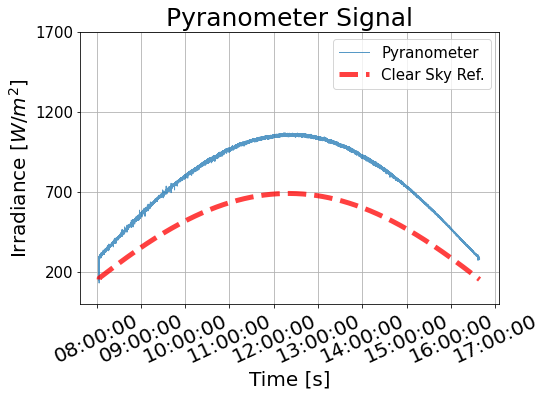

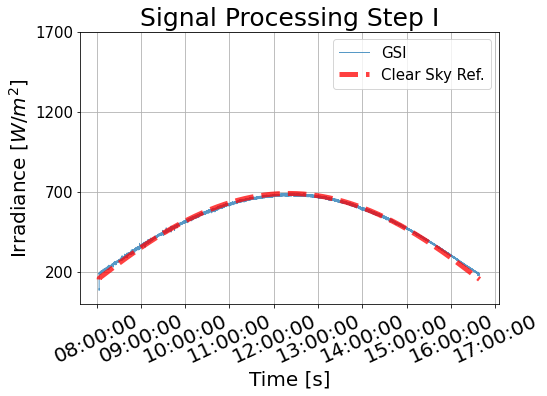

110792


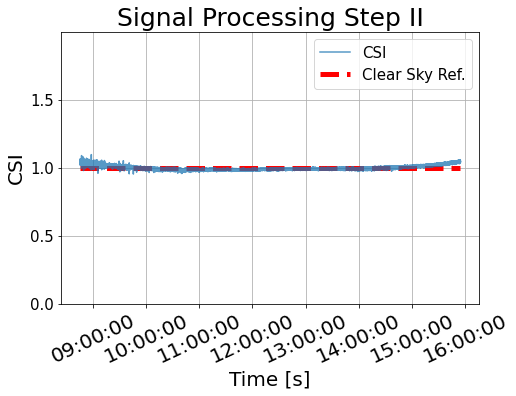

346 2017 1.4636836693610291 138.2
1.4636836693610291 69
(98900, 1) (98900, 1) (98900, 1) (98900, 1)
(98969, 1)


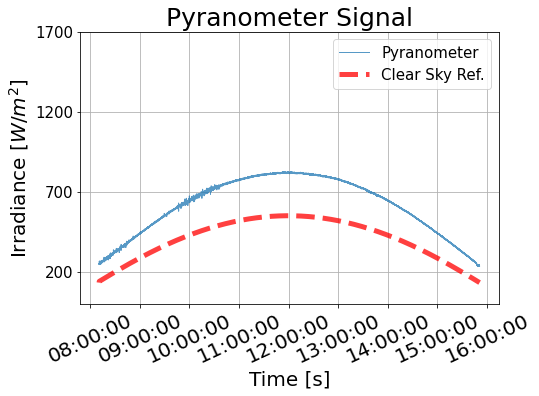

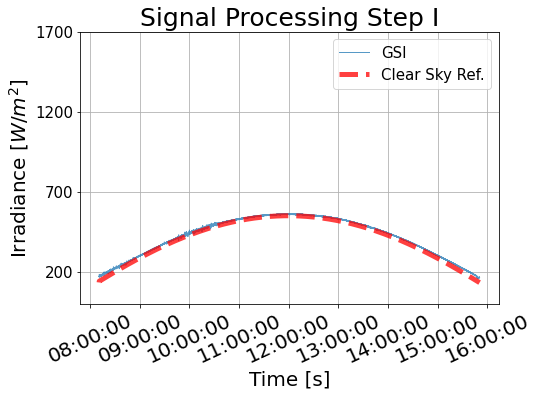

98900


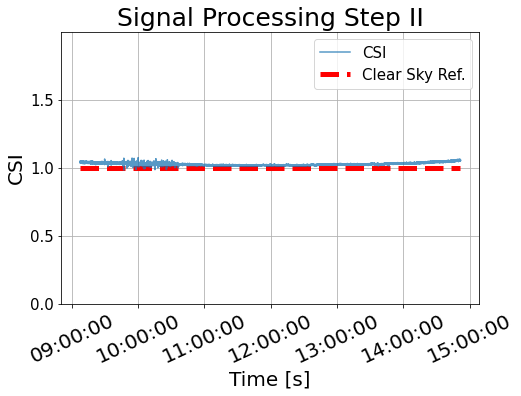

202 2018 1.453495069300485 2929.5789473684213
1.453495069300485 1464
(153923, 1) (153923, 1) (153923, 1) (153923, 1)
(155387, 1)


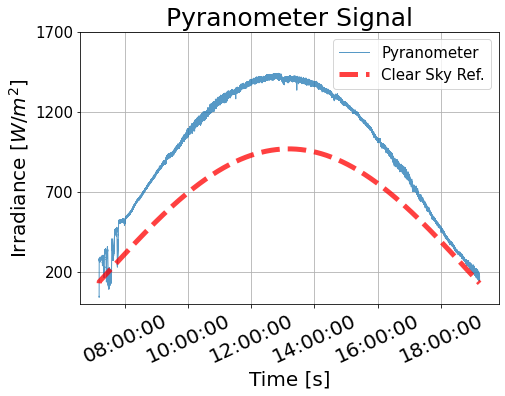

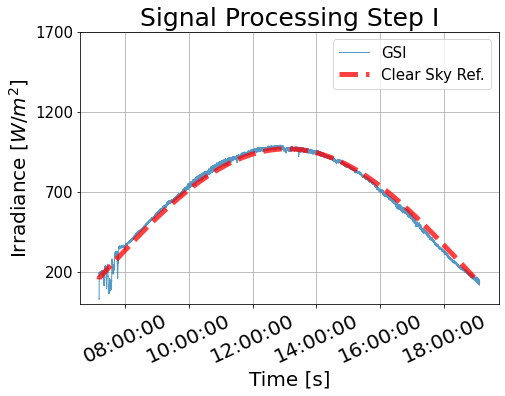

153923


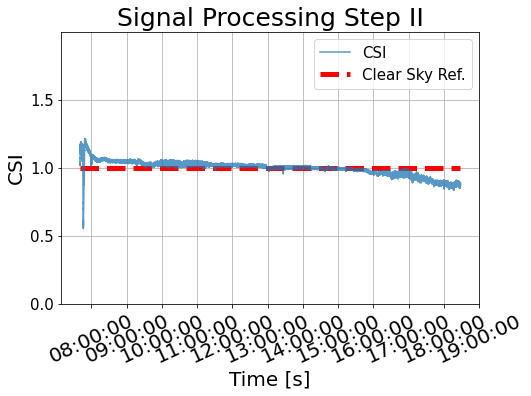

349 2017 1.4682170845028695 138.2
1.4682170845028695 69
(98629, 1) (98629, 1) (98629, 1) (98629, 1)
(98698, 1)


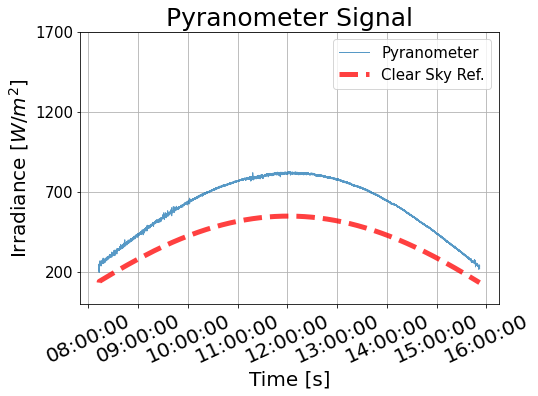

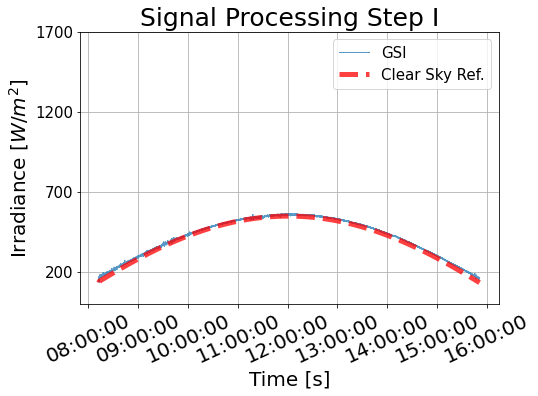

98629


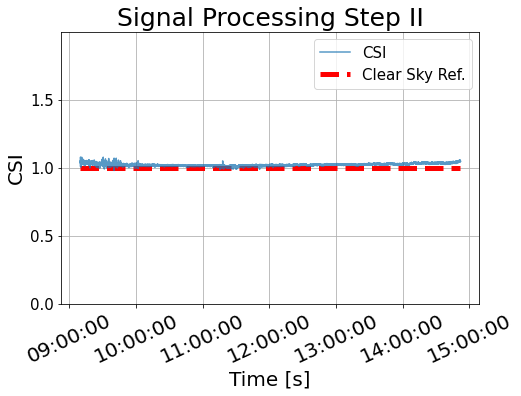

199 2018 1.4578611153977037 2929.5789473684213
1.4578611153977037 1464
(154637, 1) (154637, 1) (154637, 1) (154637, 1)
(156101, 1)


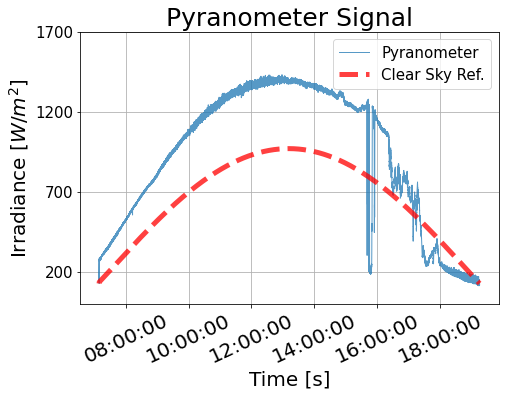

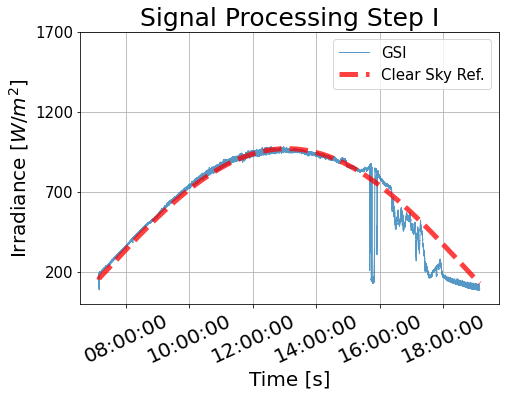

154637


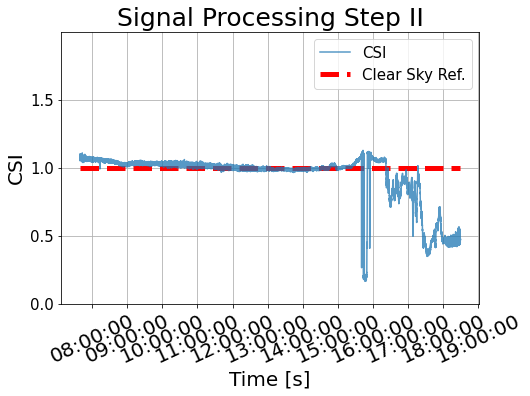

347 2017 1.465188201271147 138.2
1.465188201271147 69
(98804, 1) (98804, 1) (98804, 1) (98804, 1)
(98873, 1)


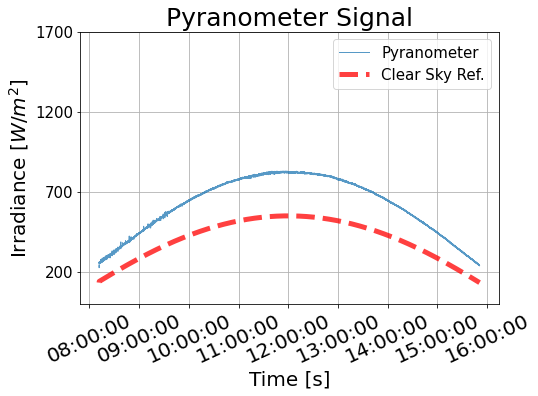

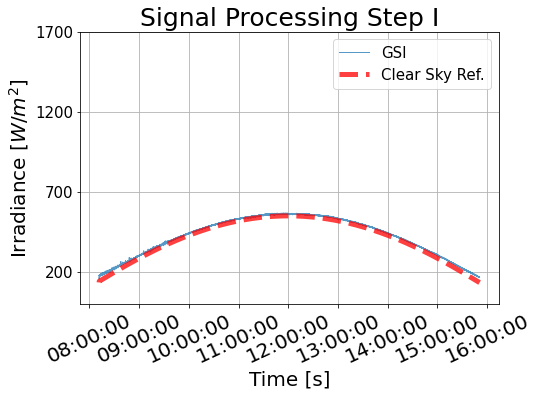

98804


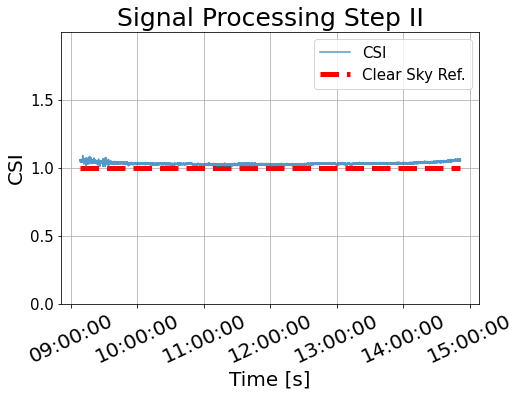

99 2018 1.5769000833820832 2929.5789473684213
1.5769000833820832 1464
(136266, 1) (136266, 1) (136266, 1) (136266, 1)
(137730, 1)


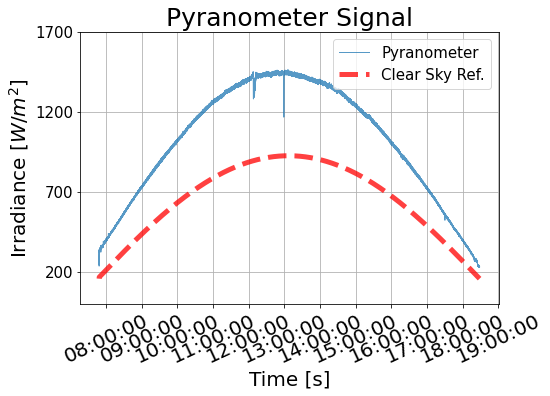

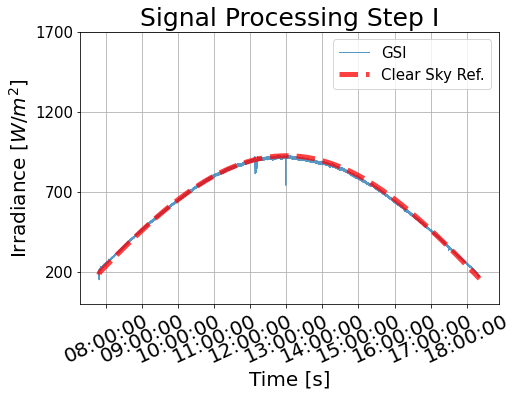

136266


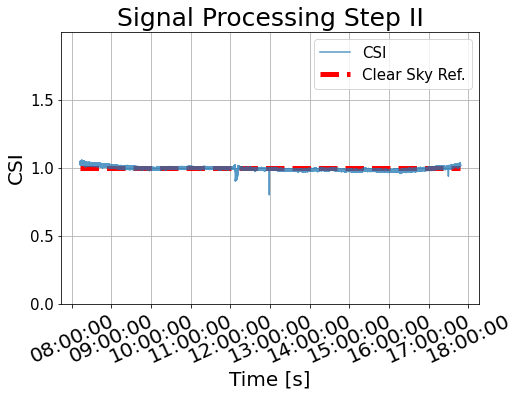

63 2018 1.5702260475564627 -83.18181818181819
1.5702260475564627 -41
(120222, 1) (120222, 1) (120222, 1) (120222, 1)
(120263, 1)


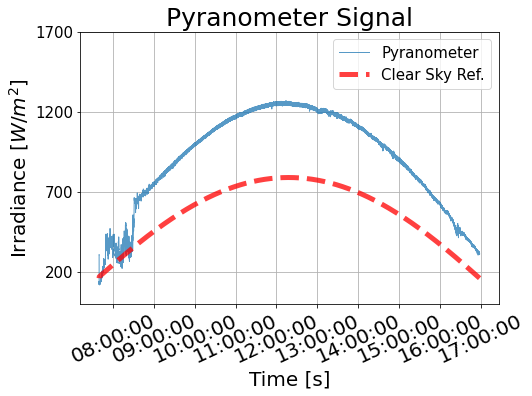

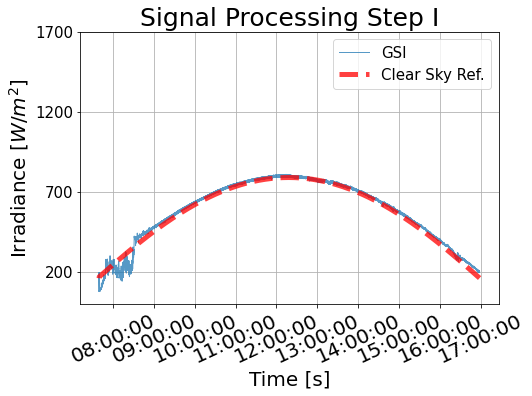

120222


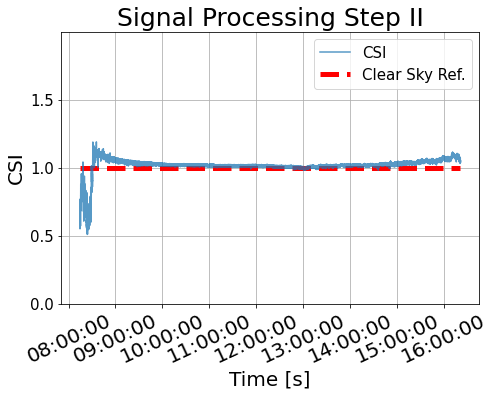

62 2018 1.5695628283094367 -83.18181818181819
1.5695628283094367 -41
(119785, 1) (119785, 1) (119785, 1) (119785, 1)
(119826, 1)


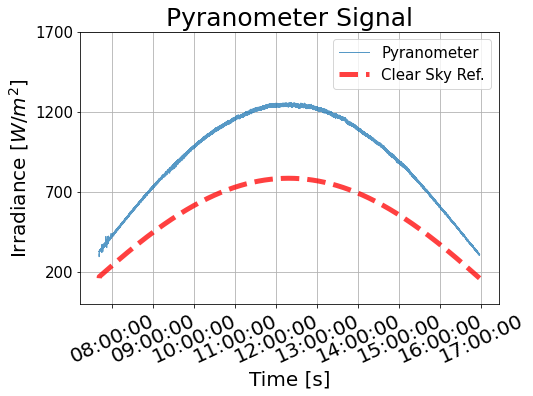

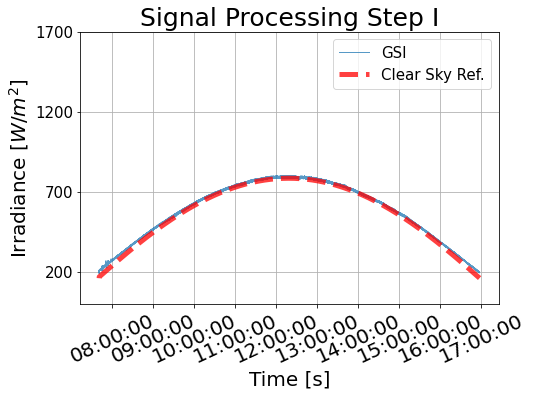

119785


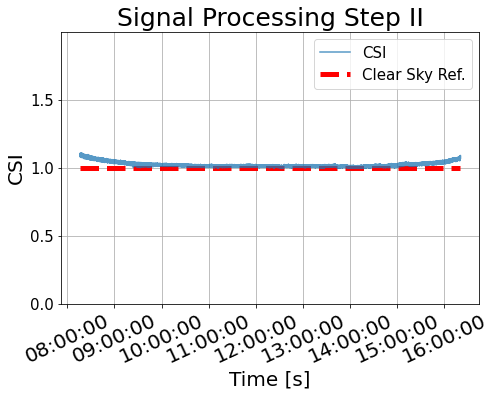

104 2018 1.5751115961070237 2929.5789473684213
1.5751115961070237 1464
(138538, 1) (138538, 1) (138538, 1) (138538, 1)
(140002, 1)


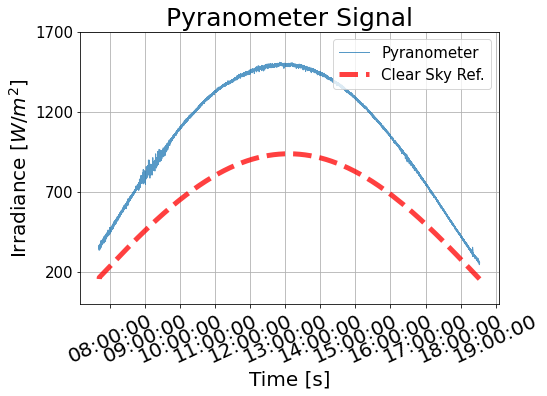

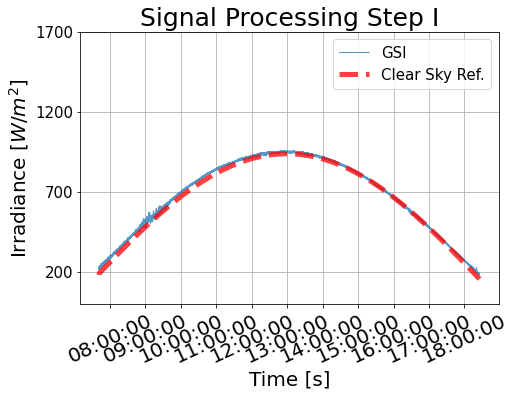

138538


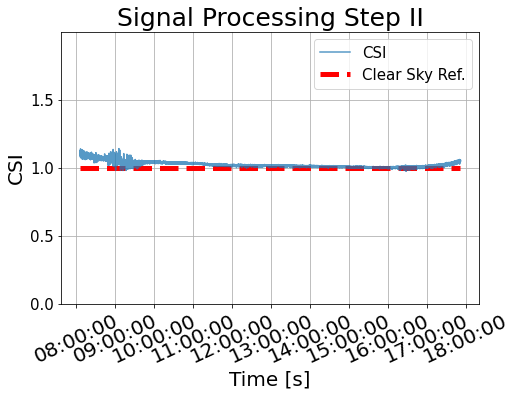

343 2017 1.45921505555932 138.2
1.45921505555932 69
(99208, 1) (99208, 1) (99208, 1) (99208, 1)
(99277, 1)


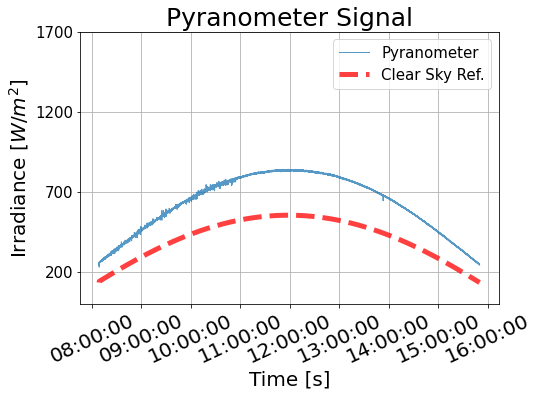

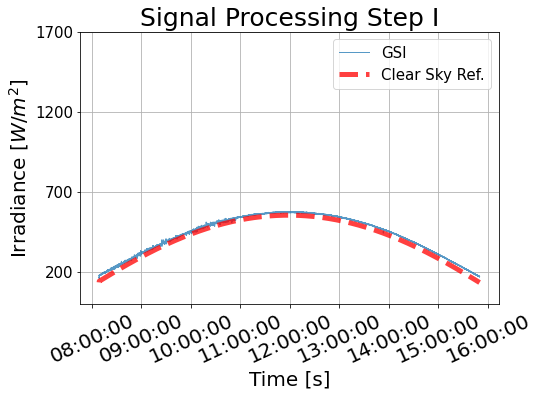

99208


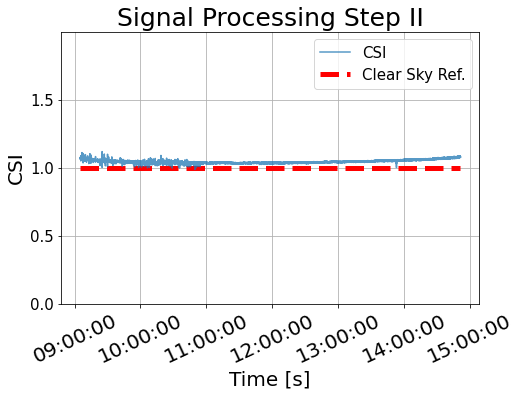

342 2017 1.4577419828902878 138.2
1.4577419828902878 69
(99317, 1) (99317, 1) (99317, 1) (99317, 1)
(99386, 1)


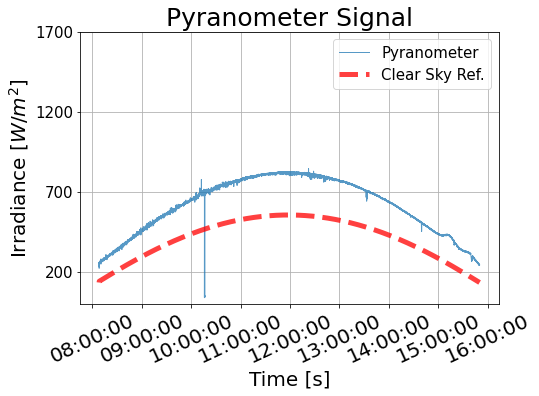

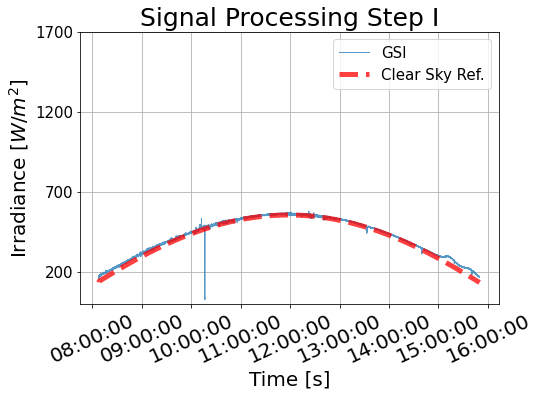

99317


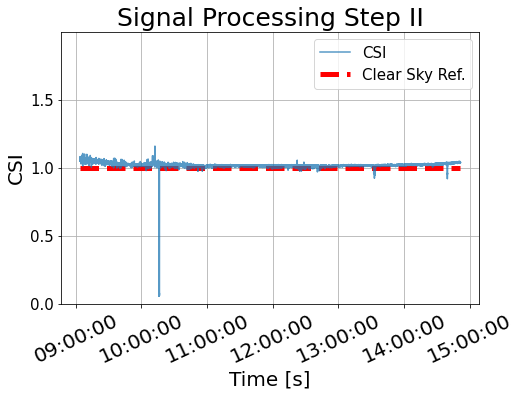

113 2018 1.5702787664453408 2929.5789473684213
1.5702787664453408 1464
(142706, 1) (142706, 1) (142706, 1) (142706, 1)
(144170, 1)


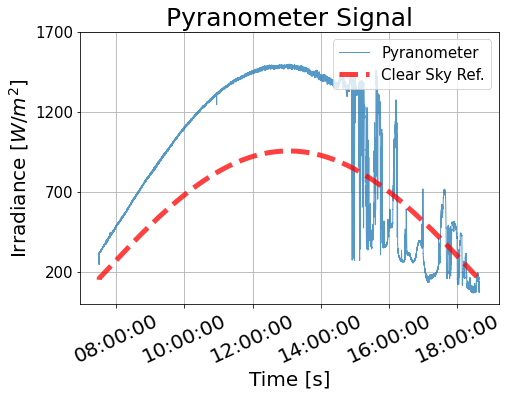

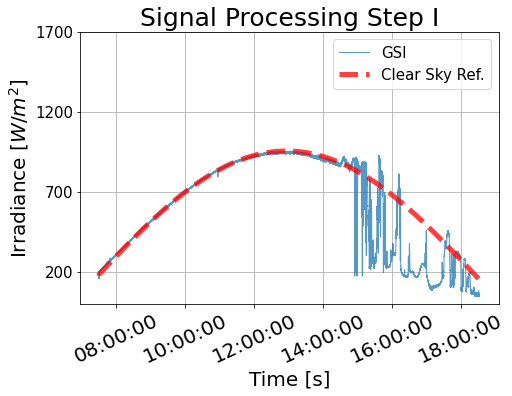

142706


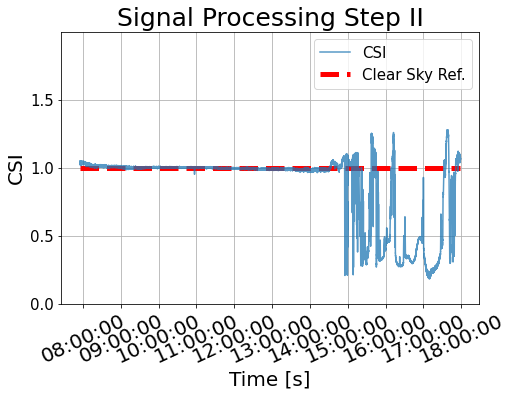

61 2018 1.5688754363540425 -83.18181818181819
1.5688754363540425 -41
(119270, 1) (119270, 1) (119270, 1) (119270, 1)
(119311, 1)


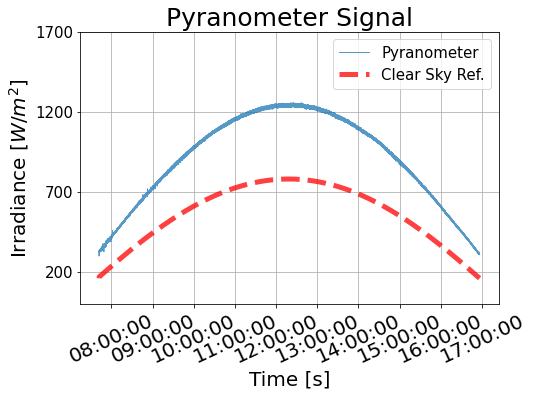

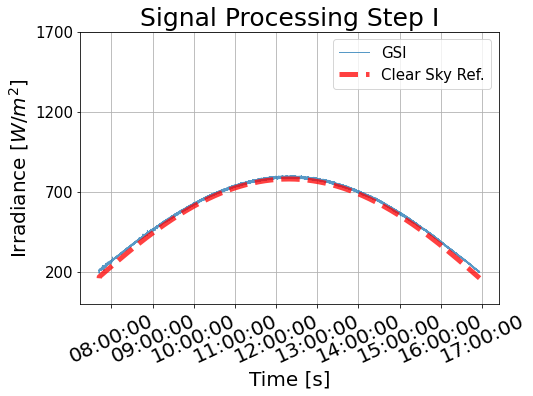

119270


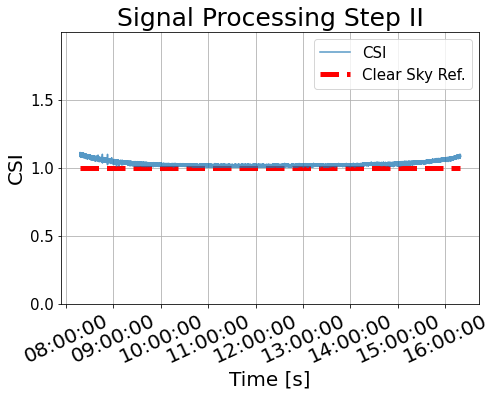

144 2018 1.539656717577754 2929.5789473684213
1.539656717577754 1464
(154109, 1) (154109, 1) (154109, 1) (154109, 1)
(155573, 1)


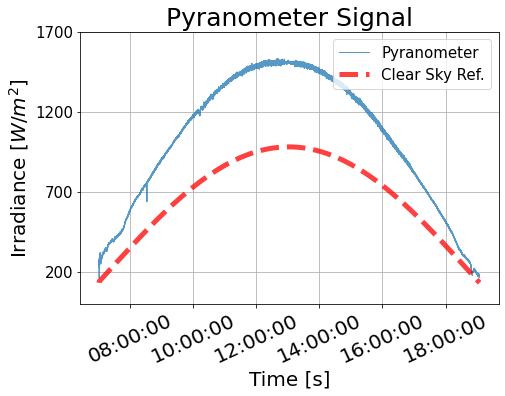

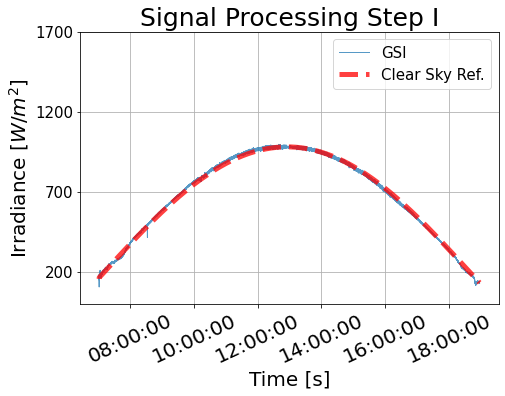

154109


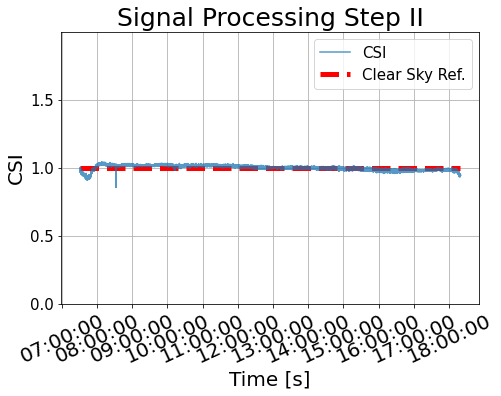

KeyboardInterrupt: 

In [8]:
def load_model(path, name):
    
    with open(path.format(name), 'rb') as f:
        C0 = pickle.Unpickler(f).load()
        C1 = pickle.Unpickler(f).load()

    print(C0.shape, len(C1))
    return C0, C1


def pyranometers_effect(t, C):
    
    def periodic_model(C, t, N = 365.):
        return C[0] * np.sin(C[1] + ( (2*np.pi) / N ) * t) + C[2]
    
    def picewise_model(C, x0, x1):
        
        if x0 <= C[4]:
            y1 = C[0]

        if x0 >  C[4]:
            y1 = C[1]

        if x0 >  C[5]:
            y1 = C[2]

        if x0 >  C[6] or x1 > 2018:
            y1 = C[3]
                       
        return y1

    x0 = t.timetuple().tm_yday
    x1 = t.timetuple().tm_year
    
    y0 = periodic_model(C[0], x0)
    y1 = picewise_model(C[1], x0, x1)
    print(x0, x1, y0, y1)
    return y0, int(y1/2)

# Global Solar Irradiance theoretical function
def _GSI(A, B, C, e_):    
    Ib  = A * np.exp( - B/np.sin(np.radians(e_)) )
    Ibc = Ib * np.cos(np.radians(90. - e_))
    Idc = C * Ib 
    Ird = 0. #* x0 * Ib * ( np.sin(np.radians(e_)) + C )
    return Ibc + Idc + Ird

def _get_coeff(n):
    # Compute Theoretical GSI Parameters
    A = 1160. +  75. * np.sin(np.radians( (360./365)*(n - 275.) ))
    B = 0.174 + .035 * np.sin(np.radians( (360./365)*(n - 100.) ))
    C = 0.095 + .04  * np.sin(np.radians( (360./365)*(n - 100.) ))
    return A, B, C
    
#     n = 5000
    
#     #plt.figure(figsize = (15, 2.5))
#     #plt.subplot(121)
#     plt.figure(figsize = (15,10))
#     plt.plot(Z, 'b-', markersize = .5, label = r'$y_{d,k}$')
#     plt.plot(Igsi(OPT[1]), 'y--', linewidth = 2., label = r'$\mathcal{I} ( \hat \theta_d^{(1)} )$')
#     plt.plot(Igsi_theorical(A,B,C), 'r--', linewidth = 2., label = r'$\mathcal{I} ( \theta_d^{(1)} )$')
#     plt.xlabel(r'k', fontsize = 25)
#     plt.ylabel(r'$[ W / m^2 ]$', fontsize = 25)
#     plt.ylim(0, 1600)
#     plt.xlim(n, Z.shape[0] - n)
#     plt.legend(prop={'size': 25})
#     plt.grid()
#     plt.show()

#     #plt.subplot(122)
#     plt.figure(figsize = (15,10))
#     plt.plot(Z/s1, 'b-', markersize = .5, label = r'$y_{d,k}$')
#     plt.plot(Igsi_theorical(A,B,C), 'r--', linewidth = 2., label = r'$\sigma_d \cdot \mathcal{I} ( \theta_d^{(1)} )$')
#     plt.xlabel(r'k', fontsize = 25)
#     plt.ylabel(r'$[ W / m^2 ]$', fontsize = 25)
#     plt.ylim(0, 1600)
#     plt.xlim(n, Z.shape[0] - n)
#     plt.legend(prop={'size': 25})
#     plt.grid()
#     plt.show()

path = r'/Users/Guille/Desktop/data_processing/data/{}'


C_ = load_model(path, name = 'clear_sky_ghi_model.pkl')


path = r'/Users/Guille/Desktop/data_processing/clear_sky_data/{}'
#path = 'E:clear_sky_data/{}'
name = '{}/trajectory_file.txt'

DX = []; DY = []; DZ = []; DT = []
c = []
d = []

j = 0
for folder in glob.glob(path.format('*')):
    if not folder.endswith('.pkl'):

        A_ = np.loadtxt(name.format(folder), delimiter = ',')
                
        for file in glob.glob('{}/*'.format(folder)):
            if file.endswith('.csv') & (len(file) < 95):
                I_ = np.loadtxt(file, delimiter = ',')
                t_ = I_[:, 0][:, np.newaxis]
                i_ = I_[:, 1][:, np.newaxis] 
                
                N = i_.shape[0]
                T = datetime.fromtimestamp(float(t_[1,:]))
                n = T.timetuple().tm_yday
                
                s, dt = pyranometers_effect(T, C_)     
                print(s, dt)
                _f_0 = interp1d(np.linspace(0, N, A_[:, 0].shape[0]), A_[:, 0], kind = 'cubic')
                _f_1 = interp1d(np.linspace(0, N, A_[:, 1].shape[0]), A_[:, 1], kind = 'cubic')
                
                e_ = _f_0(np.linspace(0, N, N))[:, np.newaxis]
                a_ = _f_1(np.linspace(0, N, N))[:, np.newaxis]
                
                A, B, C = _get_coeff(n)
                y_ = _GSI(A, B, C, e_)
                
                if dt > 0:
                    i_prime_ = i_[:N - dt]
                    t_prime_ = t_[:N - dt]
                    y_prime_ = y_[dt:]
                    e_prime_ = e_[dt:]
                    #_f_0 = interp1d(np.linspace(0, N, A_[dt:, 0].shape[0]), A_[dt:, 0], kind = 'cubic')
                    #_f_1 = interp1d(np.linspace(0, N, A_[dt:, 1].shape[0]), A_[dt:, 1], kind = 'cubic')
                else:
                    i_prime_ = i_[-dt:]
                    t_prime_ = t_[-dt:]
                    y_prime_ = y_[:N + dt]
                    e_prime_ = e_[:N + dt]
                    #_f_0 = interp1d(np.linspace(0, N, A_[:dt, 0].shape[0]), A_[:dt, 0], kind = 'cubic')
                    #_f_1 = interp1d(np.linspace(0, N, A_[:dt, 1].shape[0]), A_[:dt, 1], kind = 'cubic')
                print(i_prime_.shape, t_prime_.shape, y_prime_.shape, e_prime_.shape)
                #e_ = _f_0(np.linspace(0, N, N))[:, np.newaxis]
                #a_ = _f_1(np.linspace(0, N, N))[:, np.newaxis]

                #A, B, C = _get_coeff(n)
                #y_ = _GSI(A, B, C, e_prime_)
                print(t_.shape)
                
                t_ = [datetime.fromtimestamp(ts) for ts in t_[:, 0].tolist()]
                t_prime_ = [datetime.fromtimestamp(ts) for ts in t_prime_[:, 0].tolist()]


                plt.rcParams.update({'font.size': 20})
                    
                plt.figure(figsize = (7.5, 5))
                ax = plt.gca()
                ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
                #plt.title(file[-14:-4], fontsize = 25)
                plt.title('Pyranometer Signal', fontsize = 25)
                #plt.plot(t_, i_, lw = 1, alpha = .75, label = r'$y_{d,k}$')
                plt.plot(t_, i_, lw = 1, alpha = .75, label = r'Pyranometer')
                #plt.plot(t_, i_/s, lw = 1, label = r'$\hat{y}_{d,k}$')
                #plt.plot(t_, y_, lw = 5, color = 'r', linestyle = 'dashed', label = r'$i_{d,k}$', alpha = .75)
                plt.plot(t_, y_, lw = 5, color = 'r', linestyle = 'dashed', label = r'Clear Sky Ref.', alpha = .75)


                #plt.plot(t_prime_, y_prime_, lw = 1, label = r'$i_{d,k}$')
                #plt.plot(t_prime_, i_prime_/s, lw = 1, label = r'$i_{d,k}$')
                plt.ylim(0, 1600)
                plt.grid()
                plt.xlabel(r'Time [s]', fontsize = 20)
                #plt.xlabel(r'UNIX [s]', fontsize = 20)
                #plt.ylabel(r'GSI [$W / m^2$]', fontsize = 20)
                plt.ylabel(r'Irradiance [$W / m^2$]', fontsize = 20)
                #plt.ticklabel_format(useOffset = False, style = 'plain')
                plt.yticks(np.arange(200., 2000, 500), fontsize = 15)
                #plt.xticks(np.arange(t_.min(), t_.max(), 12500), fontsize = 15)
                plt.legend(loc='upper right', prop = {'size': 15})
                plt.xticks(rotation = 25)
                plt.savefig('{}-{}'.format(r'pyranomeger_signal', j), bbox_inches = 'tight', dpi = 500)

                plt.show()
                
                plt.figure(figsize = (7.5, 5))
                ax = plt.gca()
                ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
                #plt.title(file[-14:-4], fontsize = 25)
                plt.title('Signal Processing Step I', fontsize = 25)
                #plt.plot(t_, i_, lw = 1, label = r'$y_{d,k}$')
                #plt.plot(t_, i_/s, lw = 1, label = r'$\hat{y}_{d,k}$')
                #plt.plot(t_, y_, lw = 1, label = r'GSI')
                #plt.plot(t_prime_, i_prime_/s, alpha = .75, lw = 1, label = r'$\hat{y}^\prime_{d,k}$')
                plt.plot(t_prime_, i_prime_/s, alpha = .75, lw = 1, label = r'GSI')
                #plt.plot(t_prime_, y_prime_, lw = 5, color = 'r', linestyle = 'dashed', label = r'$i_{d,k}$', alpha = .75)
                plt.plot(t_prime_, y_prime_, lw = 5, color = 'r', linestyle = 'dashed', label = r'Clear Sky Ref.', alpha = .75)
                plt.ylim(0, 1600)
                plt.grid()
                #plt.xlabel(r'UNIX [s]', fontsize = 20)
                #plt.ylabel(r'GSI [$W / m^2$]', fontsize = 20)
                plt.xlabel(r'Time [s]', fontsize = 20)
                plt.ylabel(r'Irradiance [$W / m^2$]', fontsize = 20)
                #plt.ticklabel_format(useOffset = False, style = 'plain')
                plt.yticks(np.arange(200., 2000, 500), fontsize = 15)
                #plt.xticks(np.arange(t_.min(), t_.max(), 12500), fontsize = 15)
                plt.legend(loc='upper right', prop = {'size': 15})
                plt.xticks(rotation = 25)

                plt.savefig('{}-{}'.format(r'signal_processing_I', j), bbox_inches = 'tight', dpi = 500)

                plt.show()

                i_prime_ = i_prime_/s/y_prime_
                idx_ = e_prime_ > 19
                print(len(t_prime_))
                
                t_prime_prime_ = []
                for ts, i in zip(t_prime_, idx_):
                    if i == True: 
                        t_prime_prime_.append(ts)
                
                plt.figure(figsize = (7.5, 5))
                ax = plt.gca()
                ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
                #plt.title(file[-14:-4], fontsize = 25)
                plt.title('Signal Processing Step II', fontsize = 25)
                #plt.plot(t_prime_[idx_], i_prime_[idx_], '-', markersize = 1, label = r'$i^{csi}_{d,k}$', alpha = .75)
                plt.plot(t_prime_prime_, i_prime_[idx_], '-', markersize = 1, label = r'CSI', alpha = .75)
                #plt.hlines(1, t_prime_[idx_].min(), t_prime_[idx_].max(), linestyle = 'dashed', color = 'r', lw = 5, label = 'Clear-Sky Ref.')
                plt.hlines(1, np.min(t_prime_prime_), np.max(t_prime_prime_), linestyle = 'dashed', color = 'r', lw = 5, label = 'Clear Sky Ref.')
                plt.grid()
                plt.ylim(0, 2)
                #plt.xlabel(r'UNIX [s]', fontsize = 20)
                #plt.ylabel(r'CSI', fontsize = 20)
                plt.xlabel(r'Time [s]', fontsize = 20)
                plt.ylabel(r'CSI', fontsize = 20)
                #plt.ticklabel_format(useOffset = False, style = 'plain')
                plt.yticks(np.arange(0., 2, 0.5), fontsize = 15)
                #plt.xticks(np.arange(t_prime_[idx_].min(), t_prime_[idx_].max(), 12500), fontsize = 15)
                plt.legend(loc='upper right', prop = {'size': 15})
                plt.xticks(rotation = 25)

                plt.savefig('{}-{}'.format(r'signal_processing_II', j), bbox_inches = 'tight', dpi = 500)

                plt.show()
                
                j += 1
                
                
                #print(t_prime_.shape, idx_.shape, t_prime_[idx_].shape, t_prime_[idx_][0], t_prime_[idx_][-1])

(3,) 7
/Users/Guille/Desktop/pyranometer_detrending_model/clear_sky_data/2018_11_06
/Users/Guille/Desktop/pyranometer_detrending_model/clear_sky_data/2018_11_06/2018-11-06.csv
310 2018 1.4175596471078955 138.2
1.4175596471078955 69 (30139, 2)
1.4175596471078955 69
[[11.3049485 ]
 [11.30577009]
 [11.30659166]
 ...
 [11.10896167]
 [11.10813859]
 [11.1073155 ]]
[[11.10097047]
 [11.1017955 ]
 [11.10262051]
 ...
 [11.10896545]
 [11.10814048]
 [11.1073155 ]]
(108092, 1) (98686, 1) (98686, 1) (98686, 1) (98686, 1)
[[1.54151630e+09]
 [1.54151630e+09]
 [1.54151630e+09]
 ...
 [1.54154393e+09]
 [1.54154393e+09]
 [1.54154393e+09]]
(108092, 1) (108092, 1) (108092, 1)
[[1.54151515e+09]
 [1.54151515e+09]
 [1.54151515e+09]
 ...
 [1.54154528e+09]
 [1.54154528e+09]
 [1.54154528e+09]]


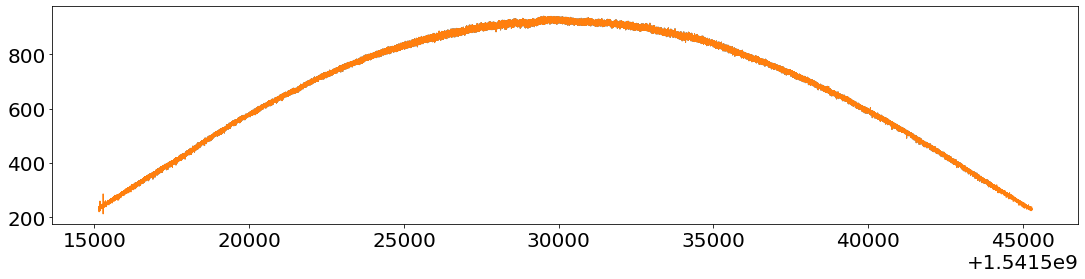

/Users/Guille/Desktop/pyranometer_detrending_model/clear_sky_data/2018_11_08
/Users/Guille/Desktop/pyranometer_detrending_model/clear_sky_data/2018_11_08/2018-11-08.csv
312 2018 1.4195588022795695 138.2
1.4195588022795695 69 (29929, 2)
1.4195588022795695 69
[[11.24050041]
 [11.24131638]
 [11.24213234]
 ...
 [11.04508434]
 [11.04426682]
 [11.0434493 ]]
[[11.03798137]
 [11.03880082]
 [11.03962027]
 ...
 [11.04508811]
 [11.04426871]
 [11.0434493 ]]
(107299, 1) (97658, 1) (97658, 1) (97658, 1) (97658, 1)
[[1.54168925e+09]
 [1.54168925e+09]
 [1.54168925e+09]
 ...
 [1.54171660e+09]
 [1.54171661e+09]
 [1.54171661e+09]]
(107299, 1) (107299, 1) (107299, 1)
[[1.54168807e+09]
 [1.54168807e+09]
 [1.54168807e+09]
 ...
 [1.54171799e+09]
 [1.54171799e+09]
 [1.54171799e+09]]


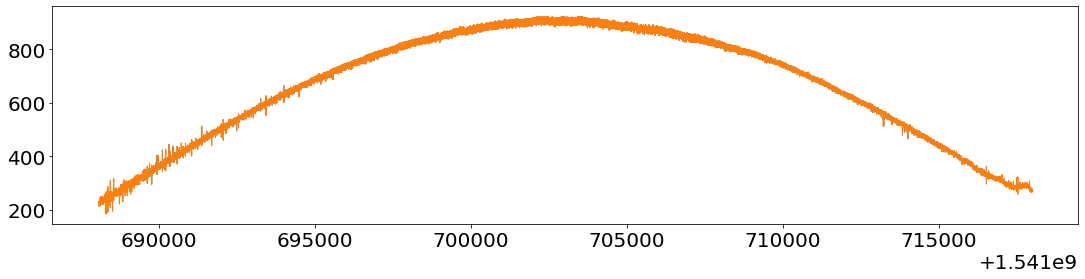

/Users/Guille/Desktop/pyranometer_detrending_model/clear_sky_data/2018_06_11
/Users/Guille/Desktop/pyranometer_detrending_model/clear_sky_data/2018_06_11/2018-06-11.csv
162 2018 1.5145332850775204 2929.5789473684213
1.5145332850775204 1464 (44354, 2)
1.5145332850775204 1464
[[15.88496382]
 [15.8858416 ]
 [15.88671938]
 ...
 [11.17033151]
 [11.16946991]
 [11.16860832]]
[[11.16251677]
 [11.16340775]
 [11.16429873]
 ...
 [11.17039033]
 [11.16949932]
 [11.16860832]]
(159036, 1) (154624, 1) (154624, 1) (154624, 1) (154624, 1)
[[1.52872177e+09]
 [1.52872177e+09]
 [1.52872177e+09]
 ...
 [1.52876490e+09]
 [1.52876490e+09]
 [1.52876490e+09]]
(159036, 1) (159036, 1) (159036, 1)
[[1.52872177e+09]
 [1.52872177e+09]
 [1.52872177e+09]
 ...
 [1.52876613e+09]
 [1.52876613e+09]
 [1.52876613e+09]]


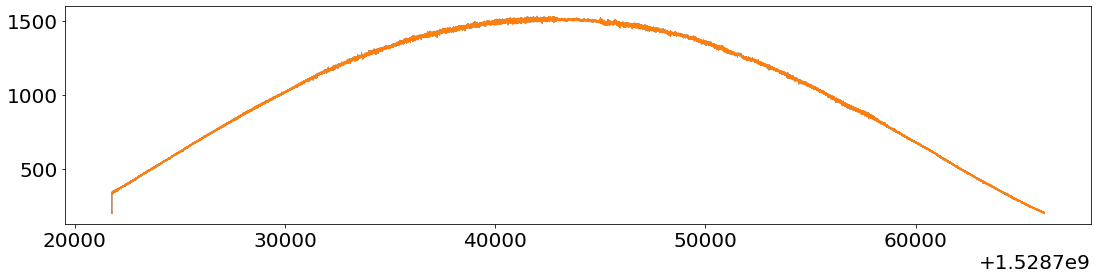

/Users/Guille/Desktop/pyranometer_detrending_model/clear_sky_data/2018_02_26
/Users/Guille/Desktop/pyranometer_detrending_model/clear_sky_data/2018_02_26/2018-02-26.csv
57 2018 1.5658883213914165 -83.18181818181819
1.5658883213914165 -41 (32758, 2)
1.5658883213914165 -41
[[11.78114783]
 [11.78203682]
 [11.7829258 ]
 ...
 [11.91933484]
 [11.91844652]
 [11.91755819]]
[[11.78114783]
 [11.78203793]
 [11.78292803]
 ...
 [11.78857356]
 [11.78768348]
 [11.78679341]]
(117420, 1) (110263, 1) (110263, 1) (110263, 1) (110263, 1)
[[1.51965731e+09]
 [1.51965731e+09]
 [1.51965731e+09]
 ...
 [1.51968820e+09]
 [1.51968820e+09]
 [1.51968820e+09]]
(117420, 1) (117420, 1) (117420, 1)
[[1.51965643e+09]
 [1.51965643e+09]
 [1.51965643e+09]
 ...
 [1.51968918e+09]
 [1.51968918e+09]
 [1.51968918e+09]]


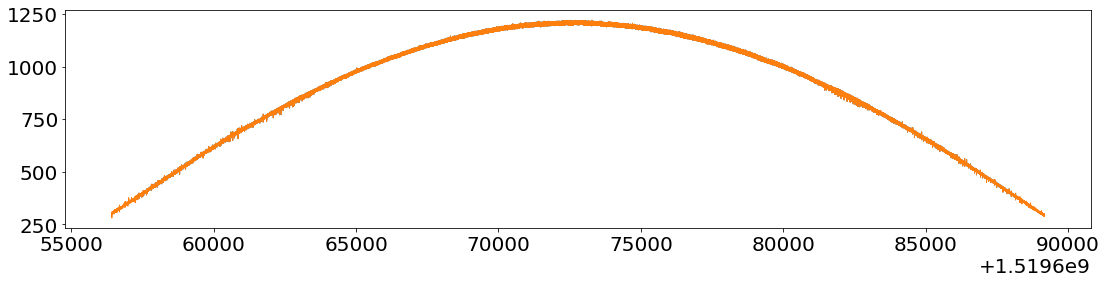

/Users/Guille/Desktop/pyranometer_detrending_model/clear_sky_data/2018_01_01
/Users/Guille/Desktop/pyranometer_detrending_model/clear_sky_data/2018_01_01/2018-01-01.csv
1 2018 1.494540403083433 -83.18181818181819
1.494540403083433 -41 (27662, 2)
1.494540403083433 -41
[[10.27237544]
 [10.27312593]
 [10.27387642]
 ...
 [10.38975251]
 [10.38900323]
 [10.38825396]]
[[10.27237544]
 [10.27312705]
 [10.27387865]
 ...
 [10.27941569]
 [10.27866415]
 [10.2779126 ]]
(99129, 1) (86206, 1) (86206, 1) (86206, 1) (86206, 1)
[[1.51482168e+09]
 [1.51482168e+09]
 [1.51482168e+09]
 ...
 [1.51484585e+09]
 [1.51484585e+09]
 [1.51484585e+09]]
(99129, 1) (99129, 1) (99129, 1)
[[1.51481999e+09]
 [1.51481999e+09]
 [1.51481999e+09]
 ...
 [1.51484764e+09]
 [1.51484764e+09]
 [1.51484764e+09]]


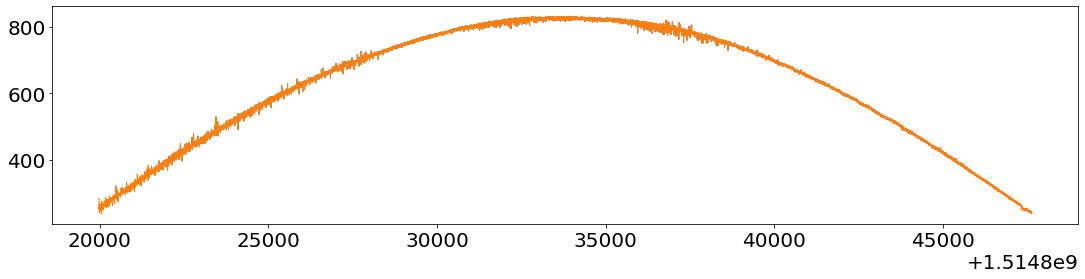

/Users/Guille/Desktop/pyranometer_detrending_model/clear_sky_data/2018_11_07
/Users/Guille/Desktop/pyranometer_detrending_model/clear_sky_data/2018_11_07/2018-11-07.csv


KeyboardInterrupt: 

In [3]:
def save_data(X, Y, Z, T, path, name):
    
    with open(path.format(name), 'wb') as f:
        pickle.dump(X, f); pickle.dump(Y, f); pickle.dump(Z, f); pickle.dump(T, f)

        
def load_model(path, name):
    
    with open(path.format(name), 'rb') as f:
        C0 = pickle.Unpickler(f).load()
        C1 = pickle.Unpickler(f).load()

    print(C0.shape, len(C1))
    return C0, C1


def pyranometers_effect(t, C):
    
    def periodic_model(C, t, N = 365.):
        return C[0] * np.sin(C[1] + ( (2*np.pi) / N ) * t) + C[2]
    
    def picewise_model(C, x0, x1):
        
        if x0 <= C[4]:
            y1 = C[0]

        if x0 >  C[4]:
            y1 = C[1]

        if x0 >  C[5]:
            y1 = C[2]

        if x0 >  C[6] or x1 > 2018:
            y1 = C[3]
                       
        return y1

    x0 = t.timetuple().tm_yday
    x1 = t.timetuple().tm_year
    
    y0 = periodic_model(C[0], x0)
    y1 = picewise_model(C[1], x0, x1)
    print(x0, x1, y0, y1)
    return y0, int(y1/2)

path = r'/Users/Guille/Desktop/pyranometer_detrending_model/data/{}'


C = load_model(path, name = 'clear_sky_ghi_model.pkl')


path = r'/Users/Guille/Desktop/pyranometer_detrending_model/clear_sky_data/{}'
#path = 'E:clear_sky_data/{}'
name = '{}/trajectory_file.txt'

DX = []; DY = []; DZ = []; DT = []
c = []
d = []
for folder in glob.glob(path.format('*')):
    print(folder)
    if not folder.endswith('.pkl'):

        A_ = np.loadtxt(name.format(folder), delimiter = ',')
        
        for file in glob.glob('{}/*'.format(folder)):
            if file.endswith('.csv'):
                print(file)
            #if file.endswith('.csv') & (len(file) < 46):
                I_ = np.loadtxt(file, delimiter = ',')
                t_ = I_[:, 0][:, np.newaxis]
                i_ = I_[:, 1][:, np.newaxis]    
                
                N = i_.shape[0]
                T = datetime.fromtimestamp(float(t_[1,:]))
                n = T.timetuple().tm_yday

                amp, inc = pyranometers_effect(T, C)     
                print(amp, inc, A_.shape)
                
                _f_0 = interp1d(np.linspace(0, N, A_[:, 0].shape[0]), A_[:, 0], kind = 'cubic')
                _f_1 = interp1d(np.linspace(0, N, A_[:, 1].shape[0]), A_[:, 1], kind = 'cubic')
                e_prime_ = _f_0(np.linspace(0, N, N))[:, np.newaxis]
                a_prime_ = _f_1(np.linspace(0, N, N))[:, np.newaxis]
                print(amp, inc)
                
                if inc > 0:
                    _f_0 = interp1d(np.linspace(0, N, A_[inc:, 0].shape[0]), A_[inc:, 0], kind = 'cubic')
                    _f_1 = interp1d(np.linspace(0, N, A_[inc:, 1].shape[0]), A_[inc:, 1], kind = 'cubic')
                else:
                    _f_0 = interp1d(np.linspace(0, N, A_[:inc, 0].shape[0]), A_[:inc, 0], kind = 'cubic')
                    _f_1 = interp1d(np.linspace(0, N, A_[:inc, 1].shape[0]), A_[:inc, 1], kind = 'cubic')
                    
                e_ = _f_0(np.linspace(0, N, N))[:, np.newaxis]
                a_ = _f_1(np.linspace(0, N, N))[:, np.newaxis]
                print(e_)
                print(e_prime_)
                #print(ELE[0], ELE[-1], I[5], I[-5])
                idx_ = e_ > 15.
                I    = i_[idx_][:, np.newaxis]#/amp
                T    = t_[idx_][:, np.newaxis]
                ELE  = e_[idx_][:, np.newaxis]
                AZ   = a_[idx_][:, np.newaxis]
                print(idx_.shape, I.shape, ELE.shape, AZ.shape, T.shape)
                print(T)
                idx_ = e_prime_ > 0.
                print(t_.shape, i_.shape, idx_.shape)
                print(t_)
                plt.subplots_adjust(right = 2.5)
                #plt.subplot(1, 3, 1)
                plt.plot(T, I, linewidth = 1)
                plt.plot(t_[idx_],i_[idx_], linewidth = 1)

                #plt.subplot(1, 3, 2)
                #plt.plot(T, ELE, linewidth = 1)

                #plt.subplot(1, 3, 3)
                #plt.plot(T, AZ, linewidth = 1)
                plt.show()
                
                #print(ELE.shape, AZ.shape, I.shape)
                
                DX.append(ELE); DY.append(AZ); DZ.append(I); DT.append(T)
    
#save_data(DX, DY, DZ, DT, path = 'Q:{}', name = 'clear_sky_ghi_model_error.pkl')
#print(len(DX), len(DY), len(DZ), len(DT))

In [ ]:
def save_data(X, Y, Z, T, path, name):
    
    with open(path.format(name), 'wb') as f:
        pickle.dump(X, f); pickle.dump(Y, f); pickle.dump(Z, f); pickle.dump(T, f)


path = 'E:clear_sky_data/{}'
name = '{}/trajectory_file.txt'

DX = []; DY = []; DZ = []; DT = []
c = []
d = []
i = 0

for folder in glob.glob(path.format('*')):
    
    if not folder.endswith('.pkl'):
        print(name.format(folder))
        A = np.loadtxt(name.format(folder), delimiter = ',')
        i += 1
        for file in glob.glob('{}\*'.format(folder)):

            if file.endswith('.csv') & (len(file) < 46):
                I = np.loadtxt(file, delimiter = ',')
                T = I[:, 0][:, np.newaxis]
                I = I[:, 1][:, np.newaxis]      
                N = I.shape[0]
        
                f0  = interp1d(np.linspace(0, N, A[:, 0].shape[0]), A[:, 0], kind = 'cubic')
                f1  = interp1d(np.linspace(0, N, A[:, 1].shape[0]), A[:, 1], kind = 'cubic')
                ELE = f0(np.linspace(0, N, N))[:, np.newaxis]
                AZ  = f1(np.linspace(0, N, N))[:, np.newaxis]
                
                t = datetime.fromtimestamp(float(T[1,:]))
                n = t.timetuple().tm_yday
                d.append(t)
                #print(n, i)
    
                I_max = I.max() - 75.
                x1  = np.mean(np.where(I > I_max)[0])
                x2  = np.where(ELE == ELE.max())[0]
                inc = int((x2 - x1))
                c.append(inc)
                #print(inc, N)
                if inc > 0:
                    ELE = f0(np.linspace(inc, N, N))[:, np.newaxis]
                    AZ  = f1(np.linspace(inc, N, N))[:, np.newaxis]
                else:
                    ELE = f0(np.linspace(0, N + inc, N))[:, np.newaxis]
                    AZ  = f1(np.linspace(0, N + inc, N))[:, np.newaxis]
                    
                #x1  = np.mean(np.where(I > I_max)[0])
                #x2  = np.where(ELE == ELE.max())[0]
                #inc = (x2 - x1)//2.
                #print(I.shape, ELE.shape, x1, x2, inc)
                
                idx = ELE > 0.
                I   = I[idx][:, np.newaxis]
                T   = T[idx][:, np.newaxis]
                ELE = ELE[idx][:, np.newaxis]
                AZ  = AZ[idx][:, np.newaxis]
                print(I.shape, ELE.shape, AZ.shape, T.shape)
                
                plt.subplots_adjust(right = 2.5)
                plt.subplot(131)
                plt.plot(T, I, linewidth = 1)

                plt.subplot(132)
                plt.plot(T, ELE, linewidth = 1)

                plt.subplot(133)
                plt.plot(T, AZ, linewidth = 1)
                plt.show()
                
                #print(ELE.shape, AZ.shape, I.shape)
                
                DX.append(ELE); DY.append(AZ); DZ.append(I); DT.append(T)

D = np.array(d)
C = np.array(c)

plt.figure()
plt.plot(D, C, 'bo')
plt.show()

#save_data(DX, DY, DZ, DT, path= 'Q:{}', name = 'clear_sky_normal_radiation.pkl')
#print(len(DX), len(DY), len(DZ), len(DT))

# Pyranometer Measurements Attenuation Biases

In [ ]:
def Ib(x0, x1):
    return x0 * np.exp( - x1 / np.sin(np.radians(X)) )


def Ibc(x0, x1):
    return Ib(x0, x1) * np.cos(np.radians(90. - X))


def Idc(x0, x1, x2):
    return x2 * Ib(x0, x1) 


def Irc(x0, x1, x2, x3):
    return .5 * x3 * Ib(x0, x1) * ( np.sin(np.radians(X)) + x2 )

# Global Solar Irradiance optimized function
def Igsi(*var):
    # Variables
    x0 = var[0][0]
    x1 = var[0][1]
    x2 = var[0][2]
    #x3 = var[0][3]

    I = Ibc(x0, x1) 
    I+= Idc(x0, x1, x2) 
    #I+= Irc(x0, x1, x2, x3)
    return I

# Global Solar Irradiance theoretical function
def Igsi_theorical(A, B, C):    
    Ib  = A * np.exp( - B/np.sin(np.radians(X)) )
    Ibc = Ib * np.cos(np.radians(90. - X))
    Idc = C * Ib 
    Ird = 0. #* x0 * Ib * ( np.sin(np.radians(X)) + C )
    return Ibc + Idc + Ird

# Error Function
def F(*var):
    return np.mean( np.sqrt( (Z - Igsi(var[0]))**2 ) )

# Random initialization of the line search for each kernel hyper-parameter within the bounds.
def random_initialization(bounds_):
    D = len(bounds_)
    x_k_ = np.zeros(D)
    for i in range(D):
        x_k_[i] = np.random.uniform(bounds_[i][0], bounds_[i][1])
    return x_k_


# Implementation of the line search gradient based optimization method
def L_BFGS(F, x0, b, n_restarts_optimizer = 5):
    f_eval = []
    x_eval = []
    i = 0
    
    while i < n_restarts_optimizer:  
    
        x0 = random_initialization(b)

        # Run the line search BFGS optimization!
        OPT = fmin_l_bfgs_b(F, x0 = x0, args = (), bounds = b, maxfun = 15000, approx_grad = True)

        if not np.isnan(OPT[1]):
            i+=1
            #print(OPT[2]['grad'])
            f_eval.append(OPT[1])
            x_eval.append(OPT[0])
        
    i     = np.argmin(f_eval)
    f_opt = f_eval[i]
    x_opt = x_eval[i]
    return f_opt, x_opt, i


def load_data(path, name):
    file = path.format(name)
    with open(file, 'rb') as f:
        X = pickle.Unpickler(f).load()
        Y = pickle.Unpickler(f).load()
        Z = pickle.Unpickler(f).load()
        T = pickle.Unpickler(f).load()
    
    return X, Y, Z, T

# Load Dataset
DX, DY, DZ, DT = load_data(path, name = 'clear_sky_normal_radiation.pkl')
print(len(DX), len(DY), len(DZ), len(DT))
print(DX[0].shape, DY[0].shape, DZ[0].shape, DT[0].shape)

# Variables Initialization
c = []
d = []
e1 = 0
e2 = 0
BX = np.empty((0, 1))
BY = np.empty((0, 3))
for i in range(len(DX))[:-1]:
    # Get Sample
    X = DX[i]
    Y = DY[i]
    Z = DZ[i]
    T = DT[i]
    print(X.shape, Z.shape, T.shape)
    # Get Sample Time
    t = datetime.fromtimestamp(float(T[1,:]))
    n = t.timetuple().tm_yday
    d.append(n)
    # Compute Theoretical GSI Parameters
    A = 1160. +  75. * np.sin(np.radians( (360./365)*(n - 275.) ))
    B = 0.174 + .035 * np.sin(np.radians( (360./365)*(n - 100.) ))
    C = 0.095 + .04  * np.sin(np.radians( (360./365)*(n - 100.) ))
    # Optimization Parameters Initialization
    x_0_    = np.array([0., 0., 0.])
    bounds_ = [(100., 2000.), (0., 1.), (0., 1.)]
    opt_    = L_BFGS(F, x0, b, n_restarts_optimizer = 5)
    # Compute attenuation Coefficietns
    s1 = Igsi(opt_[1]).max()/Igsi_theorical(A,B,C).max()
    s2 = np.mean(Igsi(opt_[1])/Igsi_theorical(A,B,C))
    c.append(s1)
    # Compute rrror with both attenuation coefficients
    e1 += np.mean( np.sqrt( (Z - Igsi_theorical(A, B, C)/s1)**2 ) )
    e2 += np.mean( np.sqrt( (Z - Igsi_theorical(A, B, C)/s2)**2 ) )
    # Save parameters
    BX = np.vstack((BX, opt_[0]))
    BY = np.vstack((BY, opt_[1]))
    print(e1, e2)
    # Display interation Results
    print(t)
    print('Th. Coeff.: ', A, B, C, ' RMSE: ', np.mean( np.sqrt( (Z - Igsi_theorical(A, B, C))**2 ) ))
    print('Em. Coeff.: ', opt_[1][0], opt_[1][1], opt_[1][2], ' RMSE: ', opt_[0])
    print('Am. Coeff.: ', s1, s2)
    
    n = 5000
    
    #plt.figure(figsize = (15, 2.5))
    #plt.subplot(121)
    plt.figure(figsize = (15,10))
    plt.plot(Z, 'b-', markersize = .5, label = r'$y_{d,k}$')
    plt.plot(Igsi(OPT[1]), 'y--', linewidth = 2., label = r'$\mathcal{I} ( \hat \theta_d^{(1)} )$')
    plt.plot(Igsi_theorical(A,B,C), 'r--', linewidth = 2., label = r'$\mathcal{I} ( \theta_d^{(1)} )$')
    plt.xlabel(r'k', fontsize = 25)
    plt.ylabel(r'$[ W / m^2 ]$', fontsize = 25)
    plt.ylim(0, 1600)
    plt.xlim(n, Z.shape[0] - n)
    plt.legend(prop={'size': 25})
    plt.grid()
    plt.show()

    #plt.subplot(122)
    plt.figure(figsize = (15,10))
    plt.plot(Z/s1, 'b-', markersize = .5, label = r'$y_{d,k}$')
    plt.plot(Igsi_theorical(A,B,C), 'r--', linewidth = 2., label = r'$\sigma_d \cdot \mathcal{I} ( \theta_d^{(1)} )$')
    plt.xlabel(r'k', fontsize = 25)
    plt.ylabel(r'$[ W / m^2 ]$', fontsize = 25)
    plt.ylim(0, 1600)
    plt.xlim(n, Z.shape[0] - n)
    plt.legend(prop={'size': 25})
    plt.grid()
    plt.show()

In [ ]:
def save_data(X, Y, Z, W, path, name):
    
    with open(path.format(name), 'wb') as f:
        pickle.dump(X, f); pickle.dump(Y, f)
        pickle.dump(Z, f); pickle.dump(W, f)

D = np.array(d)
C = np.array(c)

plt.figure()
plt.plot(d, c, 'ro')
plt.show()

#save_data(BX, BY, D, C, path, name = 'clear_sky_solar_normal_radiation_fit.pkl')
#print(BX.shape, BY.shape, D.shape, C.shape)

plt.figure()
plt.plot(d[:-1], c[:-1], 'ro')
plt.show()

plt.figure(figsize = (15, 2.5))

plt.subplot(1, 2, 1)
plt.plot(X[3][1, :], 'b-', markersize = 5)
plt.plot(X[3][5, :], 'r--', linewidth = 1.)
plt.grid()
plt.ylim(1, 1200)
plt.xlim(0, 1390)

plt.subplot(1, 2, 2)
plt.axhline(y = 1, color = 'k', linewidth = 1.)
plt.plot(X[3][0, :], 'b', linewidth = 1.)
plt.grid()
plt.ylim(0, 2)
plt.xlim(0, 1390)

plt.show()